<a href="https://colab.research.google.com/github/KeneKing12/Kenechukwu/blob/main/Lab_6__Kenechukwu_K_Odoh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
import numpy as np

#Load the California Housing Dataset

We will use the California Housing dataset from the sklearn library. We'll focus on the following features:

longitude
latitude
median_income

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame[['Longitude', 'Latitude', 'MedInc']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df.head()


,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


#Apply K-Means Clustering

K-Means clustering is applied to the dataset for a range of k values. We'll begin by choosing a range of k values from 5 to 10 and calculate silhouette scores for each to find the optimal number of clusters.

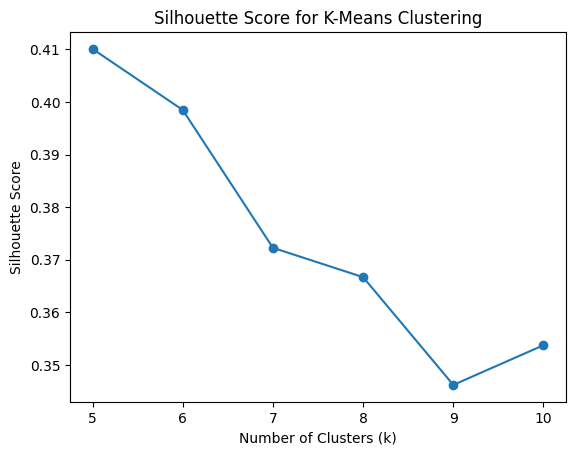

In [3]:
# Apply K-Means clustering for different values of k
sil_scores = []
k_values = range(5, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sil_scores.append(silhouette_avg)

# Plot silhouette scores for different k values
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [4]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of k values
k_values = range(5, 11)

# Initialize an empty list to store silhouette scores
sil_scores = []

# Loop through each k value, apply K-Means, and calculate the silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Fit the model on the scaled data
    cluster_labels = kmeans.labels_  # Get cluster labels for each point
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)  # Calculate silhouette score
    sil_scores.append(silhouette_avg)

# Print silhouette scores for each k value
for k, score in zip(k_values, sil_scores):
    print(f"For k = {k}, the silhouette score is {score:.4f}")


For k = 5, the silhouette score is 0.4101
For k = 6, the silhouette score is 0.3985
For k = 7, the silhouette score is 0.3723
For k = 8, the silhouette score is 0.3667
For k = 9, the silhouette score is 0.3462
For k = 10, the silhouette score is 0.3537


#Optimize the Number of Clusters using Silhouette Score

After plotting the silhouette scores, select the k value with the highest silhouette score as the optimal number of clusters for K-Means.

In [5]:
optimal_k = k_values[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")


Optimal number of clusters based on silhouette score: 5


#Analyze and Visualize Clustering Results

Next, we'll fit the K-Means model with the optimal number of clusters and visualize the results using scatter plots.

<ipython-input-6-37b3779bbf12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


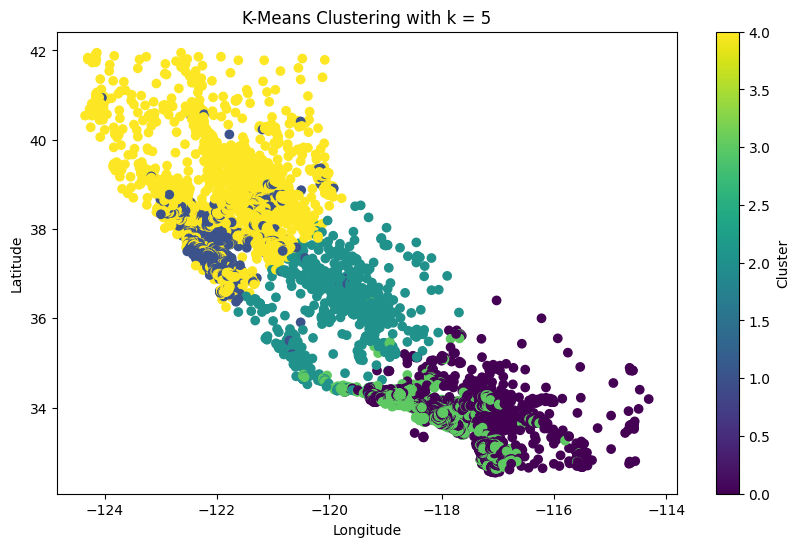

In [6]:
# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

# Plot the clusters based on longitude and latitude
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title(f"K-Means Clustering with k = {optimal_k}")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()


# Analyzing the distribution of median_income across clusters.

Cluster
0    3.104189
1    6.193948
2    2.691494
3    6.489385
4    2.993708
Name: MedInc, dtype: float64


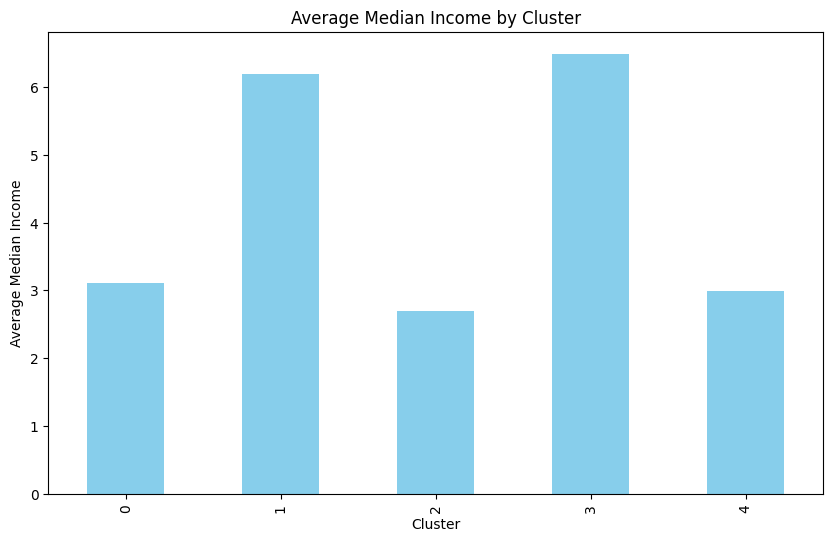

In [7]:
# Analyze the distribution of median_income per cluster
income_cluster_means = df.groupby('Cluster')['MedInc'].mean()
print(income_cluster_means)

# Visualizing median income across clusters
plt.figure(figsize=(10, 6))
income_cluster_means.plot(kind='bar', color='skyblue')
plt.title('Average Median Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Median Income')
plt.show()


#Comparison with Other Clustering Algorithms such as DBSCAN

<ipython-input-8-2c3a0ee12f3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan.labels_


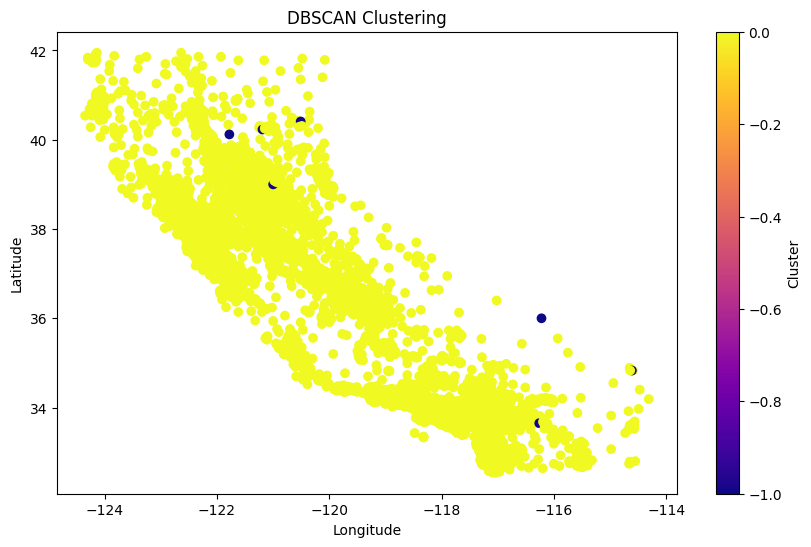

In [8]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_data)
df['DBSCAN_Cluster'] = dbscan.labels_

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Cluster'], cmap='plasma', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Compare the results of K-Means and DBSCAN
